<a href="https://colab.research.google.com/github/DheerajDinesh/CognoRise_Infotech/blob/Data_Science/FAKE_NEWS_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CognoRise Infotech/Data_Science/news.csv', encoding='ISO-8859-1')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The âPâ in PBS Should Stand for âPlutocr...,The âPâ in PBS Should Stand for âPlutocr...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL


In [ ]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [ ]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillaryâs Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The âPâ in PBS Should Stand for âPlutocr...,The âPâ in PBS Should Stand for âPlutocr...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia âPresident Obama conve...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [ ]:
text=df.text
text

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       â Kaydee King (@KaydeeKing) November 9, 2016...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The âPâ in PBS Should Stand for âPlutocr...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia âPresident Obama conve...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

stemmer = nltk.SnowballStemmer('english')
sw = stopwords.words('english')

In [ ]:
import string

In [ ]:
def clean(text):
    text = str(text).lower()  # convert to lowercase

    text=re.sub('[^a-z0-9]+', ' ', text)  # removes all regular expressions

    text=[word for word in text.split(' ') if word not in sw]  # removes stopwords
    text=" ".join(text)

    text=[stemmer.stem(word) for word in text.split(' ')] # stemming
    text=" ".join(text)
    return text


text = text.apply(clean)
text

0       daniel greenfield shillman journal fellow free...
1       googl pinterest digg linkedin reddit stumbleup...
2       u secretari state john f kerri said monday sto...
3        kayde king kaydeek novemb 9 2016 lesson tonig...
4       primari day new york front runner hillari clin...
                              ...                        
6330    state depart told republican nation committe c...
6331    p pbs stand plutocrat pentagon post oct 27 201...
6332     anti trump protest tool oligarchi reform alwa...
6333    addi ababa ethiopia presid obama conven meet l...
6334    jeb bush sudden attack trump matter jeb bush p...
Name: text, Length: 6335, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
data = vec.fit_transform(text)
data

<6335x45152 sparse matrix of type '<class 'numpy.float64'>'
	with 1634822 stored elements in Compressed Sparse Row format>

In [ ]:
print(data)

  (0, 13549)	0.01867202814864652
  (0, 7061)	0.016495617043373316
  (0, 2264)	0.027617983878197392
  (0, 19518)	0.027617983878197392
  (0, 7401)	0.028915549083263683
  (0, 8425)	0.012821769459004193
  (0, 36546)	0.022147492523349445
  (0, 28034)	0.013756091080090778
  (0, 10830)	0.022681698069898202
  (0, 28752)	0.02452356500247699
  (0, 44298)	0.023735424978473196
  (0, 37998)	0.015295304676562245
  (0, 23304)	0.010999621765085016
  (0, 25487)	0.011691760578976007
  (0, 35373)	0.02213157635150719
  (0, 41356)	0.028276394483630465
  (0, 32929)	0.022309137738854068
  (0, 9190)	0.014116552776480348
  (0, 4724)	0.015119962738334079
  (0, 38119)	0.018646039337482212
  (0, 7903)	0.022752121852275015
  (0, 42512)	0.01971698337928586
  (0, 35917)	0.018715606882435353
  (0, 3228)	0.01810534917695141
  (0, 20666)	0.029020540287455956
  :	:
  (6334, 16034)	0.023139170262601955
  (6334, 40219)	0.01206256086833758
  (6334, 38492)	0.027658707939943235
  (6334, 11540)	0.06391121077782727
  (6334, 98

In [ ]:
result = df['label']
result

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [ ]:
len(result)

6335

In [ ]:
data.shape

(6335, 45152)

In [ ]:
result.value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

Text(0.5, 1.0, 'ratio of Fake News to Real News')

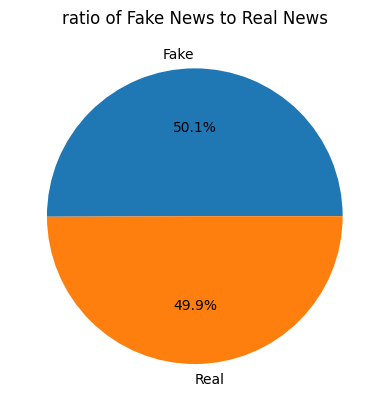

In [ ]:
plt.pie(result.value_counts(), labels=['Fake','Real'],autopct='%1.1f%%')
plt.title('ratio of Fake News to Real News')

In [ ]:
x = data
y = result.values
y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)
print(x_train)

  (0, 43750)	0.05548382097138226
  (0, 14669)	0.05104052596008253
  (0, 7498)	0.04776597041202429
  (0, 11638)	0.04116578080120797
  (0, 16665)	0.042153935937483074
  (0, 38336)	0.05104052596008253
  (0, 18215)	0.053639686921334265
  (0, 43934)	0.03992117868123334
  (0, 938)	0.04516680945077256
  (0, 6302)	0.13825239481410606
  (0, 15409)	0.1453240949964924
  (0, 34062)	0.04139890902627935
  (0, 29405)	0.1475891757301036
  (0, 34902)	0.03904167563215057
  (0, 860)	0.08601982970251194
  (0, 35662)	0.046084131604702025
  (0, 6325)	0.03826841166831061
  (0, 8160)	0.03683799017030037
  (0, 26443)	0.036280219428173104
  (0, 16023)	0.0484413649988308
  (0, 28538)	0.04332267540072456
  (0, 30963)	0.03904167563215057
  (0, 37187)	0.03672248578990824
  (0, 29702)	0.03660902584253552
  (0, 26571)	0.03520113624708369
  :	:
  (4433, 22161)	0.043223445256860706
  (4433, 30219)	0.05178862001247671
  (4433, 16464)	0.028622159352933444
  (4433, 43465)	0.033192745594977
  (4433, 27199)	0.01782038680754

In [ ]:
print(x_test)

  (0, 38453)	0.14574834526053276
  (0, 9915)	0.07287417263026638
  (0, 7174)	0.1392262384994236
  (0, 44069)	0.0672993650545085
  (0, 42075)	0.06403831167395388
  (0, 32324)	0.06403831167395388
  (0, 22475)	0.059163314610628646
  (0, 19383)	0.054767601722808534
  (0, 5291)	0.134598730109017
  (0, 34647)	0.056668816915968596
  (0, 237)	0.059163314610628646
  (0, 19110)	0.05520245071764138
  (0, 18674)	0.061724557478750566
  (0, 25328)	0.05992987029652319
  (0, 7125)	0.11985974059304638
  (0, 8183)	0.10388279467417358
  (0, 11521)	0.04940728011775849
  (0, 33832)	0.05358850703487073
  (0, 14957)	0.05781974083169587
  (0, 37989)	0.05566216139299296
  (0, 23717)	0.05136667095149915
  (0, 33465)	0.04962764314188346
  (0, 43190)	0.06077725829339929
  (0, 20325)	0.05083028908308766
  (0, 33550)	0.04487543849795267
  :	:
  (1900, 39286)	0.02425675380819327
  (1900, 11813)	0.015415460991074086
  (1900, 38659)	0.021073151264203126
  (1900, 31151)	0.027168325175572865
  (1900, 24212)	0.0113254953

In [ ]:
y_train

array(['REAL', 'REAL', 'FAKE', ..., 'FAKE', 'FAKE', 'REAL'], dtype=object)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(y_pred)

['FAKE' 'FAKE' 'FAKE' ... 'FAKE' 'FAKE' 'REAL']


In [ ]:
print('Confusion Matrix :')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Score :',accuracy_score(y_test,y_pred))

Confusion Matrix :
[[932   1]
 [751 217]]
Accuracy Score : 0.6044187269857969
